# Diamonds Price Prediction - Machine Learning with Python

Predicting Diamonds Price by their size and other attributes.

![](https://storage.googleapis.com/kaggle-datasets-images/3376290/5873471/2d1aa08fae1541e87854fce502af798d/dataset-cover.jpeg?t=2023-06-30-10-25-49)

This notbook includes the following topics:

1. Downloading a real-world dataset
2. Preparing a dataset for training
3. Training and interpreting decision trees
4. Training and interpreting random forests
5. Overfitting, hyperparameter tuning & regularization
6. Making predictions on single inputs

# Problem Statement

The given Dataset represents a range of diamonds with different features such as size, clarity, etc along with their prices (as shown below). We have to discover different types of diamonds and create a model to predict the price of unseen diamonds.

![picture](https://drive.google.com/uc?export=view&id=1t6USVUmKRvdrlOs5K-bXWo8qHuDOgLd6)

As a diamond expert, our task is to create a fully-automated system that can use this data to predict the prices of diamonds based on features like weight, quality, color, clarity and size etc. We can also use various ML models to reduce loss and estimate the best prices.

# Installation of Libraries
Here are some libraries which we need for downloading, data cleaning, exploration and data visualisation, and finally training our model.

In [1]:
!pip install opendatasets -q

In [2]:
import jovian
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
sns.set_theme(style="darkgrid")

# Downloading the Dataset


###Downloading the dataset by opendatasets library.

In [3]:
dataset_url = "https://www.kaggle.com/datasets/amirhosseinmirzaie/diamonds-price-dataset"

In [4]:
od.download(dataset_url)

Skipping, found downloaded files in "./diamonds-price-dataset" (use force=True to force download)


###Reading the dataset by using pandas.

In [5]:
diamond_df = pd.read_csv("/content/diamonds-price-dataset/diamonds.csv")

In [6]:
diamond_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
49995,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


#Data Cleaning

##Describing the data set

In [7]:
diamond_df.describe()

,carat,depth,table,price,x,y,z
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.799444,61.753006,57.457830,3944.805440,5.734403,5.737956,3.541056
std,0.475173,1.431088,2.232092,3997.938105,1.123077,1.145579,0.707065
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2410.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5351.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Checking null and Nan values

In [8]:
diamond_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

##Info related to dataset

In [9]:
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


## **Observations:**
- Data set contains only one file `diamond.csv`
- Data is 2.43 MB in size.
- Data set has 50,000 rows.
- There were no *NAN* values present in any column.
- The data set has 10 columns:
    - `carat` (Diamond weight in carat)
    - `price` (target column)
    - `cut` (diamond cutting quality)
    - `color` (diamond color from J (worst) to D (best))
    - `clarity` (A measure of diamond clarity (from left to right is worst to best: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF))
    - `depth` (Percentage depth that is equal to z / mean(x,y))
    - `table` (The width of the widest point at the top of the diamond)
    - `x` (diamond length in mm)
    - `y` (diamond width in mm)
    - `z` (diamond depth in mm)



# Data exploration and visualistion

###Exploring columns:

In [10]:
diamond_df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

###Separating input and target dataset:

In [11]:
input_df = diamond_df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z']].copy()
input_df

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
49995,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
49996,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
49997,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
49998,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74


In [12]:
target_df = diamond_df['price'].copy()
target_df

0         326
1         326
2         327
3         334
4         335
         ... 
49995    2757
49996    2757
49997    2757
49998    2757
49999    2757
Name: price, Length: 50000, dtype: int64

### Finding numeric and categorical columns:

In [13]:
numeric_cols = input_df.select_dtypes(include=['int64','float64']).columns.tolist()
print("Numeric columns:", numeric_cols, '\nCategorical columns:', ['cut', 'color', 'clarity'])

Numeric columns: ['carat', 'depth', 'table', 'x', 'y', 'z'] 
Categorical columns: ['cut', 'color', 'clarity']


### Finding number of unique categories in categorical columns:

In [14]:
input_df[['cut', 'color', 'clarity']].nunique()

cut        5
color      7
clarity    8
dtype: int64

As there are 3 categorical columns with 5, 7 and 8 categories respectively as shown above.

Therefore, we add 20(5+7+8) columns to our dataset.

### Encoding categorical columns to numeric values using OneHotEncoder().

In [15]:
encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')
encoder.fit(input_df[['cut', 'color', 'clarity']])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [16]:
encoded_cols = list(encoder.get_feature_names_out(['cut', 'color', 'clarity']))
len(encoded_cols)

20

###Replacing categorical columns by all categories columns.

In [17]:
input_df[encoded_cols] = encoder.transform(input_df[['cut', 'color', 'clarity']])

### Merging encoded categorical and numeric columns.

In [18]:
input_df = input_df[numeric_cols + encoded_cols]

In [19]:
input_df

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,59.8,61.0,3.89,3.84,2.31,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,56.9,65.0,4.05,4.07,2.31,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,62.4,58.0,4.20,4.23,2.63,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,63.3,58.0,4.34,4.35,2.75,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.72,60.8,57.0,5.75,5.76,3.50,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
49996,0.72,63.1,55.0,5.69,5.75,3.61,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
49997,0.70,62.8,60.0,5.66,5.68,3.56,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
49998,0.86,61.0,58.0,6.15,6.12,3.74,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Data visualisation:

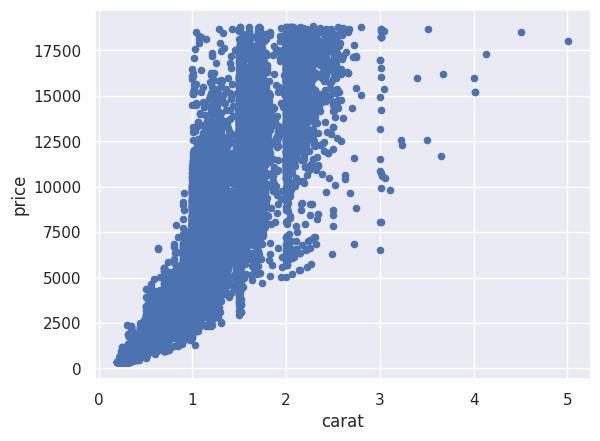

In [20]:
diamond_df.plot.scatter(x = "carat", y = "price")
plt.show()

A trend can be observed, the carat weight is an important factor in the price of diamonds. The larger a diamond, the more expensive it is.
Most diamonds are in the range 0.7 to 2.5 carats.

However, it is important to note that volume should not be the only criteria considered when buying a diamond. It is important to consider the overall quality of the diamond, as well as the color, clarity and cut quality criteria.

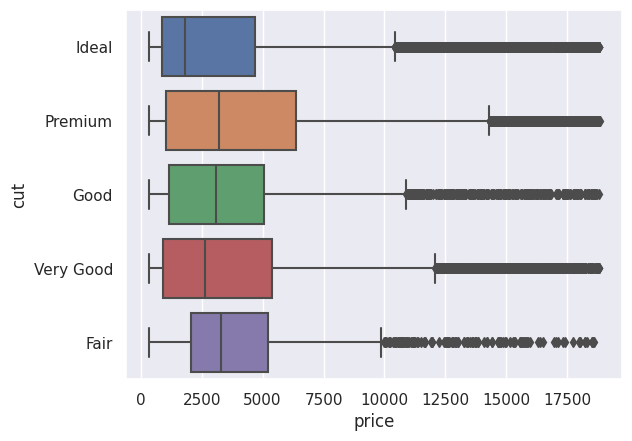

In [21]:
sns.boxplot(x = 'price', y = 'cut', data = diamond_df)
plt.show()

Premium type of cut are found to be most expensive and has wide range of prices.

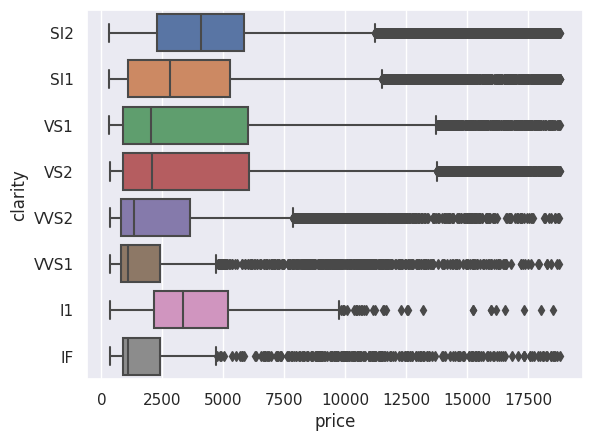

In [22]:
sns.boxplot(x = 'price', y = 'clarity', data = diamond_df)
plt.show()

The [**GIA Diamond Clarity Scale**](https://4cs.gia.edu/en-us/diamond-clarity/?gad=1&gclid=CjwKCAjww7KmBhAyEiwA5-PUSvhjyTvPVtkBy_rZ7aakeFCvWiPUS4WvcuUfx5n6hhB6q1-JVDf1lxoCx5UQAvD_BwE) has 6 categories, some of which are divided, for a total of 11 specific grades.

- **Flawless (FL)** No inclusions and no blemishes visible under 10x magnification
- **Internally Flawless (IF)** No inclusions visible under 10x magnification
- **Very, Very Slightly Included (VVS1 and VVS2)** Inclusions so slight they are difficult for a skilled grader to see under 10x magnification
- **Very Slightly Included (VS1 and VS2)** Inclusions are observed with effort under 10x magnification, but can be characterized as minor
- **Slightly Included (SI1 and SI2)** Inclusions are noticeable under 10x magnification
- **Included (I1, I2, and I3)** Inclusions are obvious under 10x magnification which may affect transparency and brilliance

Here, we can se that IF, WS1 and WS2 categories have wide range of expensive prices.

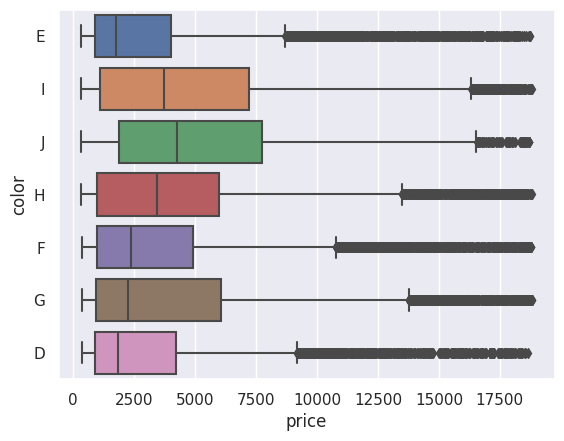

In [23]:
sns.boxplot(x = 'price', y = 'color', data = diamond_df)

plt.show()

Pink and blue diamonds have higher expensive range.
Diamonds of yellow, gray or green color, with visible inclusions and an imperfect cut are less expensive because they are considered to be less rare and less beautiful.

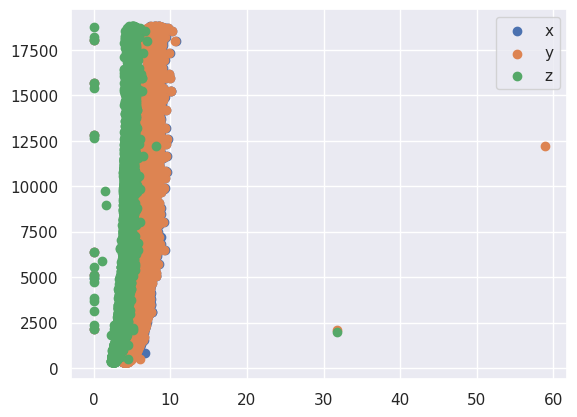

In [24]:
# depict illustration
plt.scatter(x = diamond_df['x'], y = diamond_df['price'])
plt.scatter(x = diamond_df['y'], y = diamond_df['price'])
plt.scatter(x = diamond_df['z'], y = diamond_df['price'])

# apply legend()
plt.legend(['x', 'y', 'z'])
plt.show()

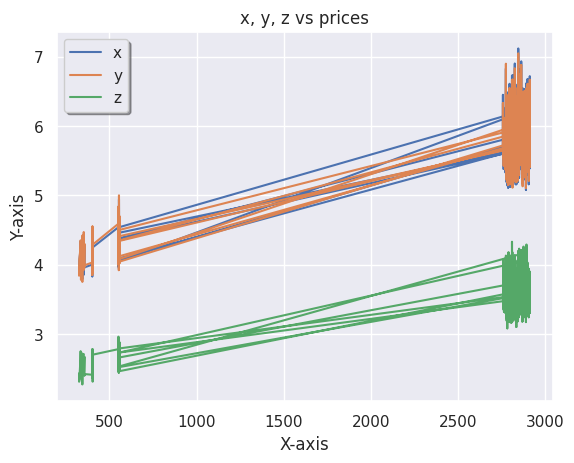

In [25]:
x_ax = range(20000)
plt.plot(diamond_df['price'][:1000], diamond_df['x'][:1000], label="x")
plt.plot(diamond_df['price'][:1000], diamond_df['y'][:1000], label="y")
plt.plot(diamond_df['price'][:1000], diamond_df['z'][:1000], label="z")
plt.title("x, y, z vs prices")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()


From the above two graphs, we found that -
- z-values are less and x & y-values are nearly coinciding.
- This implies that length and width must be higher than depth in a diamond.
- As all these three parameters are directly proportional to the prices.

### Correlation
Data correlation is the way in which one set of data may correspond to another set.

          carat     depth     table     price         x         y         z
carat  1.000000  0.027734  0.183639  0.921804  0.975037  0.950035  0.952700
depth  0.027734  1.000000 -0.293012 -0.012731 -0.025563 -0.029809  0.094337
table  0.183639 -0.293012  1.000000  0.129848  0.197198  0.185248  0.153161
price  0.921804 -0.012731  0.129848  1.000000  0.884919  0.864393  0.860963
x      0.975037 -0.025563  0.197198  0.884919  1.000000  0.972977  0.970122
y      0.950035 -0.029809  0.185248  0.864393  0.972977  1.000000  0.950030
z      0.952700  0.094337  0.153161  0.860963  0.970122  0.950030  1.000000


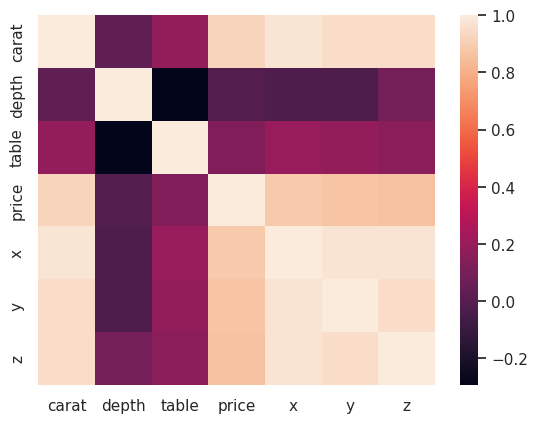

In [26]:
print(diamond_df.corr(numeric_only = True))
dataplot = sns.heatmap(diamond_df.corr(numeric_only = True))

#### **Observations:**
* `carat` is maximum correlated with `price`.
* `x`, `y`, and `z` are also correlated with price.
* `depth` and `table` are least correlated with price. So they may be not useful for the predictions.

[Note: We can't find correlation of categorical columns using the above function and other techniques like might be used. However, for the time being we are not going to use these.]

#### Dropping table and depth columns.

In [27]:
input_df = input_df.drop(['depth', 'table'], axis = 'columns')
input_df

,carat,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,3.95,3.98,2.43,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,3.89,3.84,2.31,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,4.05,4.07,2.31,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,4.20,4.23,2.63,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,4.34,4.35,2.75,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.72,5.75,5.76,3.50,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
49996,0.72,5.69,5.75,3.61,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
49997,0.70,5.66,5.68,3.56,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
49998,0.86,6.15,6.12,3.74,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## **Results of our Analysis:**
- `table` and `depth` columns are dropped since they have not significant effect on prices of diamonds.
- Categorical columns are removed. Instead those were converted to numeric columns and combined with the input columns.


# Model training and Prediction.

## Train-Test Data Split:

A commonly used ratio is 80:20, which means 80% of the data is for training and 20% for testing. We will split the data accordingly.

In [28]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(input_df,
                                                                        target_df,
                                                                        test_size=0.2,
                                                                        random_state=42)

In [29]:
train_inputs

,carat,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
39087,0.50,5.06,5.03,3.21,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30893,0.35,4.61,4.56,2.76,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
45278,1.01,6.31,6.22,4.03,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16398,1.01,6.27,6.35,3.99,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13653,1.23,6.98,6.94,4.22,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1.00,6.36,6.41,3.95,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
44732,0.52,5.17,5.22,3.20,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
38158,0.40,4.72,4.66,2.93,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
860,0.73,5.79,5.81,3.56,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [30]:
train_targets

39087    1286
30893     827
45278    2036
16398    7137
13653    5951
         ... 
11284    5197
44732    1958
38158    1200
860      2886
15795    6810
Name: price, Length: 40000, dtype: int64

In [31]:
val_inputs

,carat,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
33553,0.61,5.44,5.49,3.34,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9427,0.91,6.11,6.06,3.90,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
199,0.77,5.83,5.88,3.64,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12447,1.13,6.72,6.75,4.09,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
39489,0.32,4.33,4.36,2.74,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28567,0.30,4.31,4.34,2.63,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25079,0.32,4.34,4.38,2.72,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18707,1.41,7.17,7.21,4.40,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15200,1.20,6.78,6.76,4.22,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [32]:
val_targets

33553     931
9427     4744
199      2781
12447    5531
39489     505
         ... 
28567     742
25079     645
18707    8654
15200    6569
5857     4036
Name: price, Length: 10000, dtype: int64

### **Observations:**

- This is a supervised learning regression problem
- Train Input Data Set:
  - 40,000 rows
  - 24 columns
- Validation Input Data Set:
  - 10,000 rows
  - 24 columns
- The *train* and *validation target data set* has only one column - `prices`


## LinearRegression: Ridge Regressor

###Model Performance and RMSE Loss:

In [33]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

model1 = Ridge()
model1.fit(train_inputs, train_targets)
train_prediction1 = model1.predict(train_inputs)
print(train_prediction1)

train_rmse = mean_squared_error(train_targets, train_prediction1, squared = False)
print('\nThe RMSE loss for the training set is $ {}.'.format(train_rmse))

val_prediction1 = model1.predict(val_inputs)
print(val_prediction1)

val_rmse = mean_squared_error(val_targets, val_prediction1, squared = False)
print('\nThe RMSE loss for the validation set is $ {}.'.format(val_rmse))
print("Train R-squared score: ",model1.score(train_inputs, train_targets))
print("Validation R-squared score: ",model1.score(val_inputs, val_targets))

[ 790.36980755  378.86610968 1196.42291389 ... 1686.36355358 3332.6977277
 6697.42568689]

The RMSE loss for the training set is $ 1143.677135921377.
[-1940.82489044  5216.17906254  2930.94263302 ...  9248.65703918
  6618.89681695  4723.04919244]

The RMSE loss for the validation set is $ 1101.3057999799598.
Train R-squared score:  0.9188278846752034
Validation R-squared score:  0.9215313010136243


###Model coefficents and their weights.

In [34]:
weights = model1.coef_

weights_df = pd.DataFrame({
    'columns': train_inputs.columns,
    'weights': weights
}).sort_values('weights', ascending = False)
print(weights_df)

          columns       weights
0           carat  11094.125596
17     clarity_IF   1567.056188
22   clarity_VVS1   1208.211448
23   clarity_VVS2   1131.153247
9         color_D    842.129447
20    clarity_VS1    752.006928
10        color_E    617.276915
11        color_F    555.443971
21    clarity_VS2    443.302042
12        color_G    342.928517
6       cut_Ideal    329.358195
7     cut_Premium    197.753739
8   cut_Very Good    168.754610
2               y    124.882598
5        cut_Good    -30.522776
13        color_H   -163.389043
18    clarity_SI1   -163.560169
3               z   -542.492953
14        color_I   -640.620308
4        cut_Fair   -665.343768
1               x   -754.912643
19    clarity_SI2  -1123.005895
15        color_J  -1553.769498
16     clarity_I1  -3815.163789


###Model depends best on Carat (as shown above).

Hence, we will find the best weight for `carat`.

In [35]:
f"Carat: {max(map(abs, weights_df.weights))}"

'Carat: 11094.125596131998'

## DecisionTreesRegressor

In [36]:
from sklearn.tree import DecisionTreeRegressor

model2 = DecisionTreeRegressor(random_state=42)


###Model Performance and RMSE Loss:

In [37]:
%%time
model2.fit(train_inputs, train_targets)

print("Train R-squared score: ",model2.score(train_inputs, train_targets))
print("Validation R-squared score: ",model2.score(val_inputs, val_targets))

val_prediction2 = model2.predict(val_inputs)
mse = mean_squared_error(val_targets, val_prediction2)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))

Train R-squared score:  0.9999825954225976
Validation R-squared score:  0.9657934090948845
MSE:  528724.207
RMSE:  727.1342427640168
CPU times: user 331 ms, sys: 1.05 ms, total: 332 ms
Wall time: 334 ms


###Visual performance of model

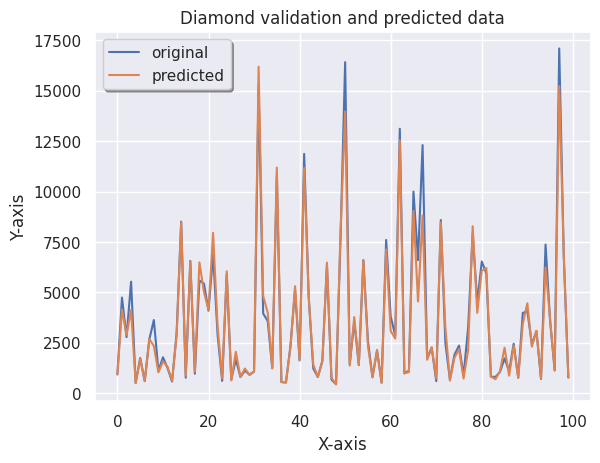

In [38]:

x_ax = range(len(val_targets))
plt.plot(x_ax[:100], val_targets[:100], label="original")
plt.plot(x_ax[:100], val_prediction2[:100], label="predicted")
plt.title("Diamond validation and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()


The above graph shows the target prices of the validation set (blue) and the predicted prices of the validation set (orange). Both the curves are nearly coinciding, hence depicting the performance of the model.

## RandomForestRegressor

In [39]:
from sklearn.ensemble import RandomForestRegressor

model3 = RandomForestRegressor()


###Model Performance and RMSE Loss:

In [40]:
%%time
model3.fit(train_inputs, train_targets)

print("Train R-squared score: ",model3.score(train_inputs, train_targets))
print("Validation R-squared score: ",model3.score(val_inputs, val_targets))

val_prediction3 = model3.predict(val_inputs)
mse = mean_squared_error(val_targets, val_prediction3)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))

Train R-squared score:  0.9972067856661239
Validation R-squared score:  0.9810793562120214
MSE:  292452.4811746868
RMSE:  540.7887583656735
CPU times: user 28 s, sys: 303 ms, total: 28.3 s
Wall time: 39.2 s


###Visual performance of model

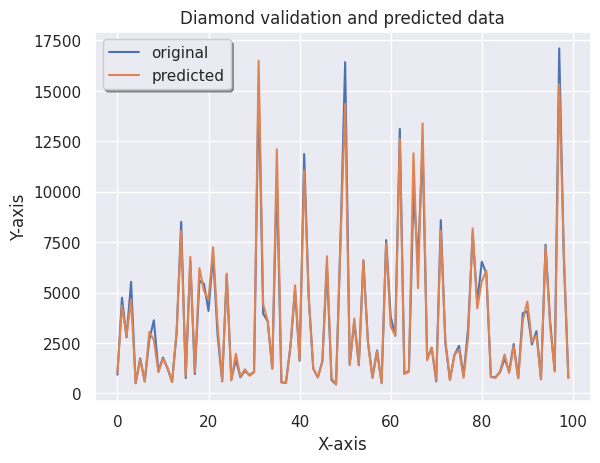

In [41]:
x_ax = range(len(val_targets))
plt.plot(x_ax[:100], val_targets[:100], label="original")
plt.plot(x_ax[:100], val_prediction3[:100], label="predicted")
plt.title("Diamond validation and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()


Clearly, we can observe that performance of *RandomForestRegressor* model is better than *DecisionTreesRegressor*. Hence, we will improve its efficiency by hypertuning the parameters.

#RandomForestRegressor Model hypertuning

In [42]:
from tqdm import tqdm

Defining function for estimating best hyperparameter for model.

In [43]:
def params(n_estimatorsList, max_depthList):
  dic = [[] for _ in n_estimatorsList]
  x = 0

  for estimator in n_estimatorsList:
    for depth in tqdm(max_depthList):
      #Model training and fitting
      model = RandomForestRegressor(n_estimators=estimator, max_depth=depth)
      model.fit(train_inputs, train_targets)
      dic[x].append(model.score(val_inputs, val_targets))
    x += 1
  pp = pprint.PrettyPrinter(indent=4)
  pp.pprint(dic)

  #graph for visualisation
  for i in range(len(n_estimatorsList)):
    plt.plot(max_depthList, dic[i], label="Estimators: " + str(n_estimatorsList[i]))
  plt.title("Diamond validation and predicted data")
  plt.xlabel('max_depth')
  plt.ylabel('accuracy')
  plt.legend(loc='best',fancybox=True, shadow=True)
  plt.grid(True)
  plt.show()

100%|██████████| 10/10 [01:16<00:00,  7.64s/it]


[   [   0.8838738759870429,
        0.9361782429886859,
        0.9662715722617466,
        0.9788247969507549,
        0.9808378854382267,
        0.9809488231529172,
        0.9806308831343339,
        0.9806568854391909,
        0.9806304440428838,
        0.9807563782844588],
    [   0.8832191696993811,
        0.937806249898114,
        0.9660755105442291,
        0.9788547460428969,
        0.9810272917445508,
        0.9810750277109518,
        0.9807848192364064,
        0.9805985824006915,
        0.9809074212496491,
        0.9807172602274988],
    [   0.88278550580691,
        0.9362022215719283,
        0.9661912799066465,
        0.9786689823445832,
        0.9811765804870534,
        0.9808493096225852,
        0.9809124783569384,
        0.9805244055171876,
        0.9806173975133217,
        0.9807883357399289]]


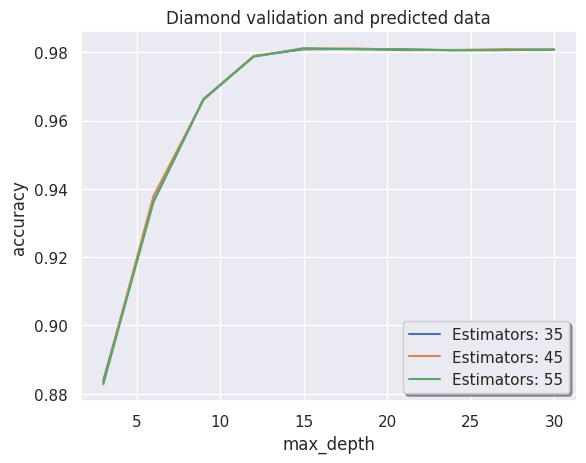

In [44]:
params(range(35,60,10), range(3,31,3))

Here, we observe that accuracy is increasing till max_depth = 15 after which it is getting constant.

100%|██████████| 30/30 [02:46<00:00,  5.53s/it]


[   [   0.6130822895023424,
        0.8327786691235526,
        0.8806964942601158,
        0.9044309161651563,
        0.9231316298485769,
        0.9386529302665994,
        0.945848588964074,
        0.9571290152973737,
        0.966569127448762,
        0.9715316629754364,
        0.9757188467448433,
        0.978080059966681,
        0.9801936695633581,
        0.9803536284824437,
        0.9805151258648463,
        0.9802304683936458,
        0.9806372625974361,
        0.9809506344876364,
        0.9802808158849186,
        0.9801400054157529,
        0.9803738540917553,
        0.980527570137791,
        0.9799710686943974,
        0.9805175148583376,
        0.9801984126577176,
        0.9803534103678049,
        0.9803334406645492,
        0.9801509608934459,
        0.9802859721802732,
        0.9802920648367943],
    [   0.613171764041681,
        0.8429025078714651,
        0.8842407002263958,
        0.9046045434768735,
        0.9238244531519717,
        0.93675898071941

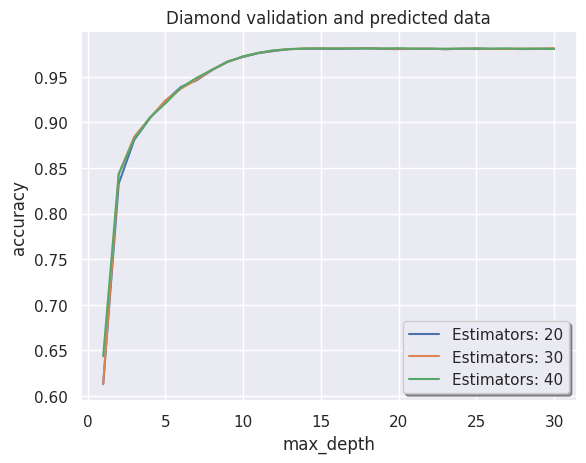

In [45]:
params(range(20,50,10), range(1,31))

#Best hyperparameter for the model.

By the analysis from the above graph, accuracy is maximum found to be 98.11 % for n_estimator = 40 and max_depth = 16. Hence these hyperparameters are best for the RandomForestRegressor model.

In [46]:
!pip install jovian --upgrade -q
import jovian

In [47]:
jovian.reset()
jovian.log_hyperparams(n_estimator=40, max_depth=16)

[jovian] Hyperparams logged.


# Conclusion:
- We found that the best model for model for our project is `RandomForestRegressor(n_estimator=40, max_depth=16)`.
- The `score=98.11%` of model is good enough to predict the price.
- The `rmse` loss is minimized after hypertuning the parameters.

# Future Work:
- Train XGBoost model to improve performance a little more.
- Implement a method to find correlation between categorical and numeric columns.
- Work on other ML projects and explore more.
- Participate in kaggle competition.
- Apply for jobs related to ML and data scientist.



# References:

- Libraries and Data Resources:
  * Dataset from Kaggle - https://www.kaggle.com/datasets/amirhosseinmirzaie/diamonds-price-dataset
  * Seaborn Library - https://seaborn.pydata.org/introduction.html
  * Scikit Learn - https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
  * Matplotlib  - https://matplotlib.org/stable/plot_types/index.html

- Research and Information:
  * Diamond prices depends on - https://www.i-diamants.com/en/diamond-price-factors.html,01324
  * Diamond clarity - https://4cs.gia.edu/en-us/diamond-clarity/?gad=1&gclid=CjwKCAjww7KmBhAyEiwA5-PUSvhjyTvPVtkBy_rZ7aakeFCvWiPUS4WvcuUfx5n6hhB6q1-JVDf1lxoCx5UQAvD_BwE
  * Build a Machine Learning Project From Scratch with Python and Scikit-learn - https://www.youtube.com/watch?v=Qr9iONLD3Lk&t=837s
  * Machine Learning with Python: Zero to GBMs - https://jovian.com/learn/machine-learning-with-python-zero-to-gbms

- Resources for exploratory analysis & visualization:
  * EDA project from scratch - https://www.youtube.com/watch?v=kLDTbavcmd0
  * Data Analysis with Python - https://zerotopandas.com
  * Geeksforgeeks - https://www.geeksforgeeks.org/what-is-exploratory-data-analysis/

- Debugging and Updation:
  * Stackoverflow - https://stackoverflow.com/questions/74305444/error-while-trying-to-run-corr-in-python-with-pandas-module
  * Stackexchange - https://stats.stackexchange.com/questions/484299/how-to-check-the-correlation-between-categorical-and-numeric-independent-variabl




